## Assignment 2

Using the corpus of Fake vs Real news, write some code which does the following:

-Split the data into two datasets - one of Fake news and one of Real news

For every headline:

-Get the sentiment scores

-Find all mentions of geopolitical entites

-Save a CSV which shows the text ID, the sentiment scores, and column showing all GPEs in that text

-Find the 20 most common geopolitical entities mentioned across each dataset - plot the results as a bar charts

In [1]:
#Install the following: it is in setup.sh folder
#tqdm
#spaCy
#python -m spacy download en_core_web_sm

# terminal + : pip install spacytextblob (not in setup)

In [1]:
# Data analysis
import os
import pandas as pd
from tqdm import tqdm #quick overview of time (progress bar)

# NLP
import spacy
nlp = spacy.load("en_core_web_sm") #English model

# sentiment analysis VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() #using VADER for the analysis

# visualisations
import matplotlib.pyplot as plt #simple visulizations

2022-04-26 20:31:17.566776: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-26 20:31:17.566819: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Load the data:
# get the filepath
filepath = os.path.join("..","..","CDS-LANG","tabular_examples","fake_or_real_news.csv")

In [3]:
# load the data
#open csv with pandas
data = pd.read_csv(filepath)

In [4]:
#looking at the dataset
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
#Starting with the whole dataset and splitting into real and fake news later

In [5]:
#Getting textID
#https://stackoverflow.com/questions/26098710/rename-unnamed-column-pandas-dataframe
#Rename column 0 (the unnamed column) textID.
data.rename(columns={'Unnamed: 0':'textID'}, inplace=True)
data

,textID,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [6]:
#Getting sentiment score for a single text in the dataset
text_example = data["title"] [3] #Getting the 4th file in the dataset
text_example

"Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'"

In [7]:
analyzer.polarity_scores(text_example)
#slightly negative

{'neg': 0.266, 'neu': 0.591, 'pos': 0.143, 'compound': -0.3595}

In [8]:
##### see below
#Making a list of all sentiment scores for every headline (aka the title column) in the dataset
sentiment_score = [] #empty list for inputting the sentiment score

for title in data["title"]: #For every single title in the "title" column in the pandas dataframe
    scores = analyzer.polarity_scores(title) #score using VADER
    sentiment_score.append(scores) #appending to the list
len(sentiment_score) #Should be 6335 entries in the list (see "data")
#sentiment_score #(uncomment to see all)

6335

In [9]:
#Making a list of all sentiment scores for every headline (aka the title column) in the dataset
def sent_score(dataframe_column):
    output_list =[] #empty list for inputting the sentiment score
    for title in dataframe_column: #For every single title in the "title" column in the pandas dataframe
        score = analyzer.polarity_scores(title) #score using VADER
        output_list.append(score) #appending to the list
    return output_list

In [12]:
sentiment_score = sent_score(data["title"])

In [13]:
#Getting the sentiment score for every headline in the dataset into a dataframe

sentiment_df = pd.DataFrame(sentiment_score, columns= ["neg", "neu", "pos", "compound"]) #columns
sentiment_df

,neg,neu,pos,compound
0,0.444,0.556,0.000,-0.4939
1,0.242,0.645,0.113,-0.5267
2,0.000,0.762,0.238,0.3612
3,0.266,0.591,0.143,-0.3595
4,0.243,0.654,0.103,-0.3612
...,...,...,...,...
6330,0.000,1.000,0.000,0.0000
6331,0.000,1.000,0.000,0.0000
6332,0.192,0.808,0.000,-0.2263
6333,0.000,0.479,0.521,0.8271


In [14]:
#combining the two dataframes: 'data' dataframe and 'sentiment_df' dataframe
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
sentimentedDF = pd.concat([data, sentiment_df], axis=1, join='inner')
sentimentedDF

,textID,title,text,label,neg,neu,pos,compound
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0.444,0.556,0.000,-0.4939
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0.242,0.645,0.113,-0.5267
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0.000,0.762,0.238,0.3612
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0.266,0.591,0.143,-0.3595
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0.243,0.654,0.103,-0.3612
...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0.000,1.000,0.000,0.0000
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0.000,1.000,0.000,0.0000
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0.192,0.808,0.000,-0.2263
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271


In [15]:
#Finding mentions of geopolitical entites in headlines (aka title column)
#two empty lists
ents = []
headline_title = []

for headline in tqdm(nlp.pipe(data["title"], batch_size=500)): #tqdm = progress bar #formula from session_5
    for entity in headline.ents:
        #only keep entities if they are GPE (geopolitical entities)
        if entity.label_ == "GPE":
            headline_title.append(headline.text) #headline text into headline_title list
            ents.append(entity.text) #GPE into the ents list
        else:
            continue

6335it [00:08, 766.91it/s]


In [16]:
print(len(ents)) #Checking if the two lists are the same length
print(len(headline_title))

1840
1840


In [17]:
# getting the two lists in a combined dataframe
GPE_test = pd.DataFrame({"title": headline_title, "GPE Found": ents})
GPE_test.head(20) #Getting the first 20 entries in the dataset (there are many)

,title,GPE Found
0,Kerry to go to Paris in gesture of sympathy,Paris
1,The Battle of New York: Why This Primary Matters,New York
2,"Tehran, USA",Tehran
3,"Tehran, USA",USA
4,Iran reportedly makes new push for uranium con...,Iran
5,"With all three Clintons in Iowa, a glimpse at ...",Iowa
6,What's in that Iran bill that Obama doesn't like?,Iran
7,The 1 chart that explains everything you need ...,America
8,Hillary Clinton Makes A Bipartisan Appeal on S...,Staten Island
9,Sanders Trounces Clinton in W. Va. -- But Will...,W. Va.


In [18]:
#combining the previously combined dataframe (the one with sentiments) and the new dataframe (the one with GPEs)
mergedDF = pd.merge(sentimentedDF, GPE_test, on="title", how = "outer") 
#you apprently need an outer-join in order to get the texts where no GPEs are found (NaN = Not a number)
#inner-joining will result in getting only entries where a GPE has been found in the title
mergedDF

,textID,title,text,label,neg,neu,pos,compound,GPE Found
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0.444,0.556,0.000,-0.4939,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0.242,0.645,0.113,-0.5267,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0.000,0.762,0.238,0.3612,Paris
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0.266,0.591,0.143,-0.3595,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0.243,0.654,0.103,-0.3612,New York
...,...,...,...,...,...,...,...,...,...
6739,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,0.192,0.808,0.000,-0.2263,NaN
6740,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,Ethiopia
6741,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,Obama
6742,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,East Africa


In [19]:
#Now splitting the dataset: splitting into real news
real_news = mergedDF[mergedDF['label'] == "REAL"] #session_6
real_news

,textID,title,text,label,neg,neu,pos,compound,GPE Found
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0.000,0.762,0.238,0.3612,Paris
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0.243,0.654,0.103,-0.3612,New York
8,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,0.000,1.000,0.000,0.0000,NaN
9,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,0.000,1.000,0.000,0.0000,NaN
10,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,0.000,1.000,0.000,0.0000,Iran
...,...,...,...,...,...,...,...,...,...
6737,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0.000,1.000,0.000,0.0000,NaN
6740,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,Ethiopia
6741,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,Obama
6742,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0.000,0.479,0.521,0.8271,East Africa


In [20]:
#Counting the GPE's in the real_news dataset
real_news.value_counts("GPE Found")

GPE Found
Obama                 129
Iran                   96
US                     62
America                49
U.S.                   42
                     ... 
North Dakota            1
North Carolina          1
Nigeria                 1
New York Debate         1
the United States'      1
Length: 193, dtype: int64

<AxesSubplot:>

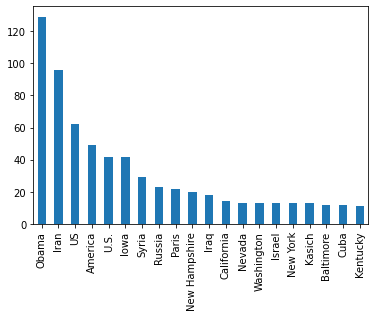

In [21]:
#Plotting the 20 most frequently mentioned GPE in the real news dataframe as a Bar Chart
real_news['GPE Found'].value_counts().nlargest(20).plot.bar()

In [22]:
#doing the same with the fake news category
#Splitting the data into fake_news
fake_news = mergedDF[mergedDF['label'] == "FAKE"] 
(fake_news)

,textID,title,text,label,neg,neu,pos,compound,GPE Found
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0.444,0.556,0.000,-0.4939,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0.242,0.645,0.113,-0.5267,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0.266,0.591,0.143,-0.3595,NaN
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,0.000,1.000,0.000,0.0000,Tehran
6,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,0.000,1.000,0.000,0.0000,USA
...,...,...,...,...,...,...,...,...,...
6733,8411,Will the Media Reset After the Election or Are...,Written by Peter Van Buren venerable New Yor...,FAKE,0.125,0.875,0.000,-0.2500,NaN
6734,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE,0.465,0.535,0.000,-0.7804,NaN
6736,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE,0.118,0.882,0.000,-0.1531,Brazil
6738,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,0.000,1.000,0.000,0.0000,NaN


In [23]:
#Counting the GPEs in the fake_news dataset
fake_news.value_counts("GPE Found")

GPE Found
US             112
Russia          93
Syria           44
U.S.            39
America         38
              ... 
Korea            1
Kuznetsov        1
LA               1
Larium           1
truckjunkie      1
Length: 225, dtype: int64

<AxesSubplot:>

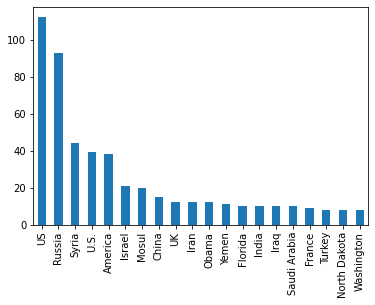

In [24]:
#Plotting the 20 most frequently mentioned GPE in the fake news dataframe as a Bar Chart
fake_news['GPE Found'].value_counts().nlargest(20).plot.bar()

In [29]:
#saving the dframe in specific folder
mergedDF.to_csv(os.path.join("..","..","cds-lang", "Lang-assignments", "output", "assign_2.csv"))

print("Done! dframe has been generated and saved in the output folder as assign_2.csv")

Done! dframe has been generated and saved in the output folder as assign_2.csv
